In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Loading dataset
data = pd.read_csv('concatenated_train.csv')

In [3]:
# Display dataset
data

,ImageFileName,Red_Channel_Distribution,Green_Channel_Distribution,Blue_Channel_Distribution,Edge_Density,MeanBlobSize,MaxBlobSize,target
0,C100P61ThinF_IMG_20150918_144104_cell_128.png,146.5920,108.2592,102.9936,0.1408,1.000000,1.0,uninfect
1,C100P61ThinF_IMG_20150918_144104_cell_131.png,155.7472,115.0592,110.2320,0.1328,1.000000,1.0,uninfect
2,C100P61ThinF_IMG_20150918_144104_cell_144.png,158.4128,117.5648,112.1712,0.1344,0.000000,0.0,uninfect
3,C100P61ThinF_IMG_20150918_144104_cell_21.png,158.5968,118.3712,114.6064,0.1280,0.000000,0.0,uninfect
4,C100P61ThinF_IMG_20150918_144104_cell_34.png,156.4768,116.3568,113.4704,0.1376,1.000000,2.0,uninfect
...,...,...,...,...,...,...,...,...
3495,C131P92ThinF_IMG_20151004_145410_cell_133.png,162.4080,116.5392,112.1696,0.2080,0.000000,0.0,infect
3496,C131P92ThinF_IMG_20151004_150208_cell_137.png,153.7248,101.7120,101.5936,0.2032,1.500000,2.0,infect
3497,C131P92ThinF_IMG_20151004_150208_cell_138.png,157.5808,105.1808,109.3184,0.1696,1.000000,1.0,infect
3498,C131P92ThinF_IMG_20151004_150208_cell_139.png,150.9536,101.0272,104.1936,0.2624,1.333333,2.0,infect


In [4]:
# Create a new column 'target_encoded' with 0 for 'uninfect' and 1 for 'infected'
data['target_encoded'] = data['target'].apply(lambda x: 0 if x == 'uninfect' else 1)

In [5]:
# Display dataset 
data

,ImageFileName,Red_Channel_Distribution,Green_Channel_Distribution,Blue_Channel_Distribution,Edge_Density,MeanBlobSize,MaxBlobSize,target,target_encoded
0,C100P61ThinF_IMG_20150918_144104_cell_128.png,146.5920,108.2592,102.9936,0.1408,1.000000,1.0,uninfect,0
1,C100P61ThinF_IMG_20150918_144104_cell_131.png,155.7472,115.0592,110.2320,0.1328,1.000000,1.0,uninfect,0
2,C100P61ThinF_IMG_20150918_144104_cell_144.png,158.4128,117.5648,112.1712,0.1344,0.000000,0.0,uninfect,0
3,C100P61ThinF_IMG_20150918_144104_cell_21.png,158.5968,118.3712,114.6064,0.1280,0.000000,0.0,uninfect,0
4,C100P61ThinF_IMG_20150918_144104_cell_34.png,156.4768,116.3568,113.4704,0.1376,1.000000,2.0,uninfect,0
...,...,...,...,...,...,...,...,...,...
3495,C131P92ThinF_IMG_20151004_145410_cell_133.png,162.4080,116.5392,112.1696,0.2080,0.000000,0.0,infect,1
3496,C131P92ThinF_IMG_20151004_150208_cell_137.png,153.7248,101.7120,101.5936,0.2032,1.500000,2.0,infect,1
3497,C131P92ThinF_IMG_20151004_150208_cell_138.png,157.5808,105.1808,109.3184,0.1696,1.000000,1.0,infect,1
3498,C131P92ThinF_IMG_20151004_150208_cell_139.png,150.9536,101.0272,104.1936,0.2624,1.333333,2.0,infect,1


In [6]:
# Exclude the 'target' and 'ImageFileName' columns from X
X = data.drop(['target', 'ImageFileName'], axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
# Choose the number of components you want
n_components = 3  
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_scaled)

In [7]:
# Checking Explained Variance Ratio
sum(pca.explained_variance_ratio_)

0.8625862357295039

## PCA with Class Labels: Infected & Uninfected 

In [8]:
data["PCA1"] = principal_components[:, 0]
data["PCA2"] = principal_components[:, 1]

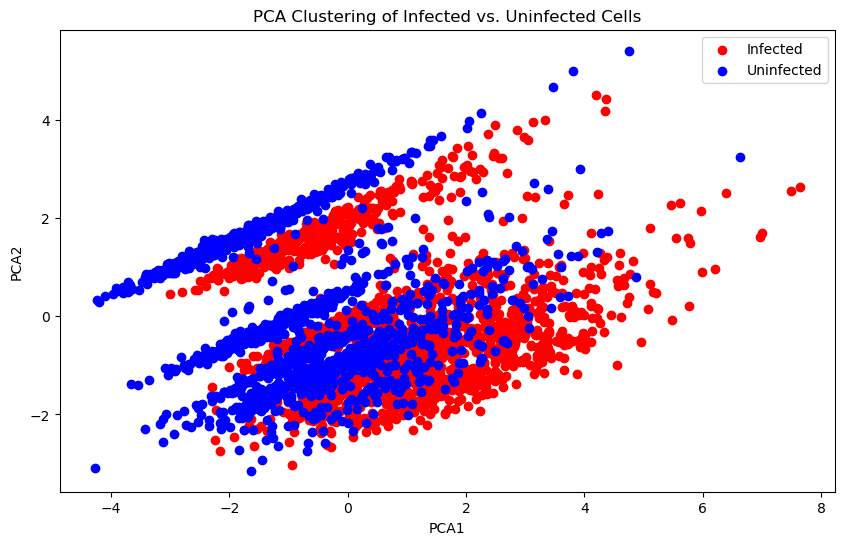

In [10]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(10, 6))

# Filter data into infected and uninfected groups
infected = data[data["target_encoded"] == 1]
uninfected = data[data["target_encoded"] == 0]

# Create a scatter plot for infected and uninfected data points
plt.scatter(infected["PCA1"], infected["PCA2"], c='red', label='Infected')
plt.scatter(uninfected["PCA1"], uninfected["PCA2"], c='blue', label='Uninfected')

# Set labels and add a legend
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()

# Set the title of the plot
plt.title("PCA Clustering of Infected vs. Uninfected Cells")

# Save the plot as an image after it has been displayed
plt.savefig('Dataset/PCA_Outputs/PCA_Fig1.png')

# Display the plot
plt.show()

## PCA on Image Characteristics

In [11]:
# Create a new DataFrame with the principal components
principal_df_1 = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
principal_df_1

,PC1,PC2,PC3
0,-0.474382,0.284708,1.024851
1,-1.470926,-0.272967,0.776805
2,-2.488601,1.240492,0.102619
3,-2.707426,1.132639,0.164272
4,-1.308994,-1.169673,0.816889
...,...,...,...
3495,-1.208120,0.968782,-2.794857
3496,1.398581,-1.112398,-1.257576
3497,-0.136361,-0.311877,-1.245493
3498,1.994799,-1.070874,-2.519520


In [12]:
# Add back the ImageFileName column for reference
principal_df_1['ImageFileName'] = data['ImageFileName']
principal_df_1

,PC1,PC2,PC3,ImageFileName
0,-0.474382,0.284708,1.024851,C100P61ThinF_IMG_20150918_144104_cell_128.png
1,-1.470926,-0.272967,0.776805,C100P61ThinF_IMG_20150918_144104_cell_131.png
2,-2.488601,1.240492,0.102619,C100P61ThinF_IMG_20150918_144104_cell_144.png
3,-2.707426,1.132639,0.164272,C100P61ThinF_IMG_20150918_144104_cell_21.png
4,-1.308994,-1.169673,0.816889,C100P61ThinF_IMG_20150918_144104_cell_34.png
...,...,...,...,...
3495,-1.208120,0.968782,-2.794857,C131P92ThinF_IMG_20151004_145410_cell_133.png
3496,1.398581,-1.112398,-1.257576,C131P92ThinF_IMG_20151004_150208_cell_137.png
3497,-0.136361,-0.311877,-1.245493,C131P92ThinF_IMG_20151004_150208_cell_138.png
3498,1.994799,-1.070874,-2.519520,C131P92ThinF_IMG_20151004_150208_cell_139.png


In [13]:
# Extract the principal components
X = principal_df_1[['PC1', 'PC2', 'PC3']].values

c:\Users\sharm\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sharm\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sharm\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sharm\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sharm\anaco

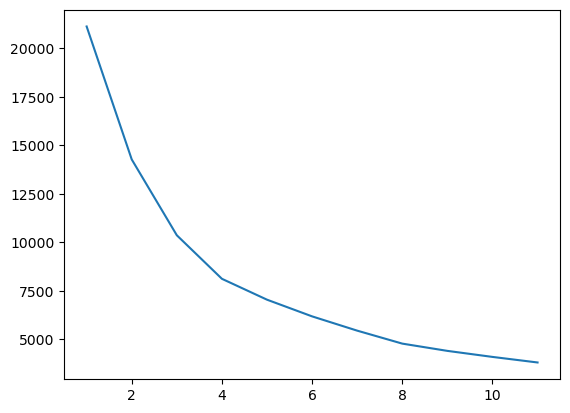

In [14]:
# Determining the best value for k
inertia = []
for k in range(1,12):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)   
    inertia.append(kmeans.inertia_)
plt.plot(range(1,12),inertia)

In [15]:
# Perform K-Means clustering (you can change the number of clusters as needed)
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X)

c:\Users\sharm\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

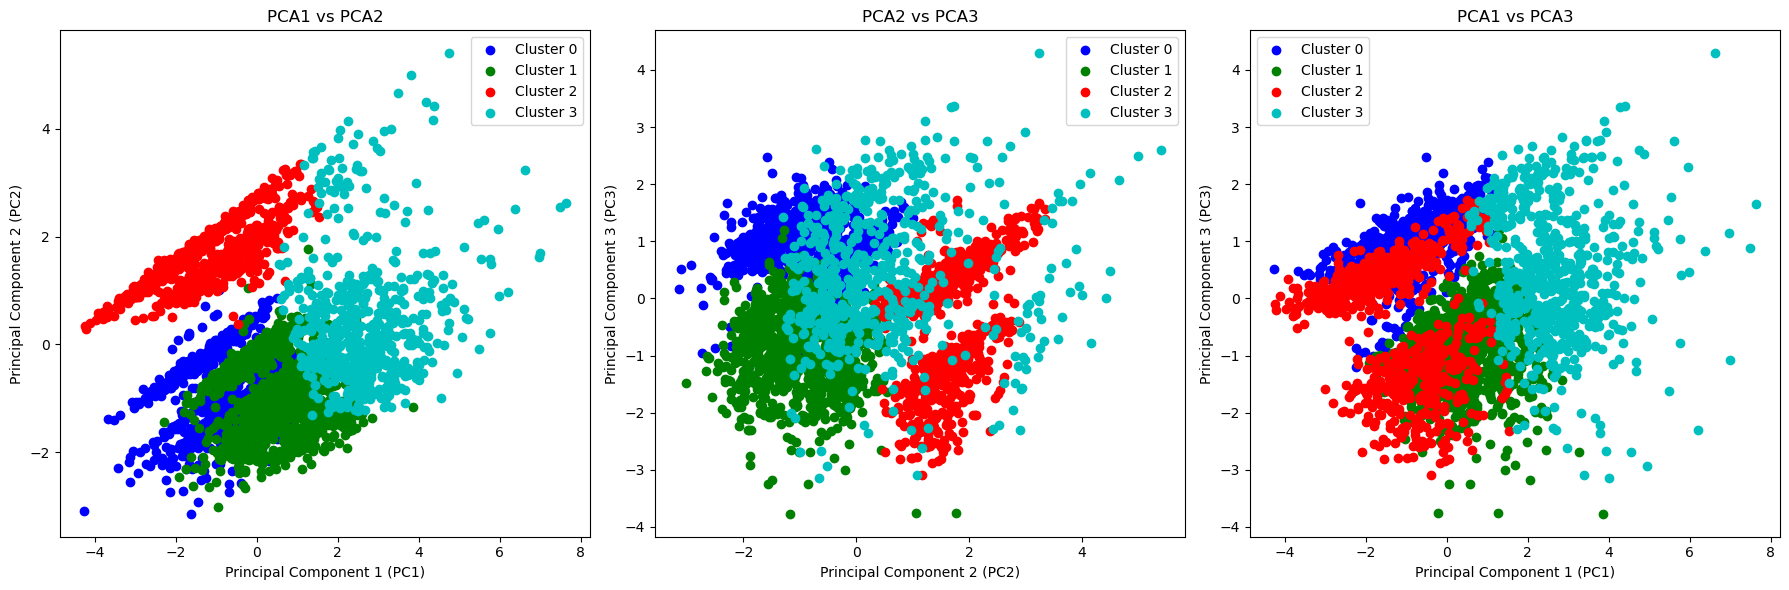

In [16]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Add cluster labels to the DataFrame
principal_df_1['Cluster'] = kmeans.labels_

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define the colors for clusters
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for cluster_label, color in zip(range(num_clusters), colors):
    cluster_data = principal_df_1[principal_df_1['Cluster'] == cluster_label]
    
    # Scatter plot for PCA1 vs PCA2
    axes[0].scatter(cluster_data['PC1'], cluster_data['PC2'], c=color, label=f'Cluster {cluster_label}')
    axes[0].set_title('PCA1 vs PCA2')
    axes[0].set_xlabel('Principal Component 1 (PC1)')
    axes[0].set_ylabel('Principal Component 2 (PC2)')
    
    # Scatter plot for PCA2 vs PCA3
    axes[1].scatter(cluster_data['PC2'], cluster_data['PC3'], c=color, label=f'Cluster {cluster_label}')
    axes[1].set_title('PCA2 vs PCA3')
    axes[1].set_xlabel('Principal Component 2 (PC2)')
    axes[1].set_ylabel('Principal Component 3 (PC3)')
    
    # Scatter plot for PCA1 vs PCA3
    axes[2].scatter(cluster_data['PC1'], cluster_data['PC3'], c=color, label=f'Cluster {cluster_label}')
    axes[2].set_title('PCA1 vs PCA3')
    axes[2].set_xlabel('Principal Component 1 (PC1)')
    axes[2].set_ylabel('Principal Component 3 (PC3)')

# Add titles and legends to each subplot
for ax in axes:
    ax.legend()

# Show the subplots
plt.tight_layout()

# Save the plot as an image after it has been displayed
plt.savefig('Dataset/PCA_Outputs/PCA_Fig2.png')

plt.show()

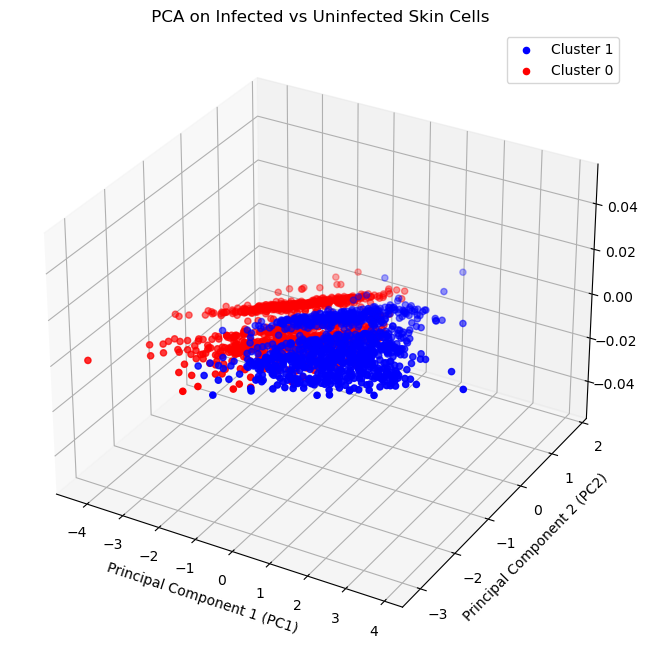

In [17]:
# Import necessary libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Add cluster labels to the DataFrame
principal_df_1['Cluster'] = kmeans.labels_

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define the colors for Infected and Uninfected
colors = ['b', 'r']

for label, color in zip([1, 0], colors):
    cluster_data = principal_df_1[principal_df_1['Cluster'] == label]
    
    # Scatter plot for PCA1 vs PCA2 vs PCA3
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], c=color, label=f'Cluster {label}')

# Add titles, labels, and a legend
ax.set_title(' PCA on Infected vs Uninfected Skin Cells')
ax.set_xlabel('Principal Component 1 (PC1)')
ax.set_ylabel('Principal Component 2 (PC2)')

ax.legend()# Save the plot as an image after it has been displayed
plt.savefig('Dataset/PCA_Outputs/PCA_Fig3.png')

# Show the 3D scatter plot
plt.show()